Měření rezonanční frekvence v závislosti na prohnutí

měkké plexi: 70cm x 50 cm x 1mm 
kov: 

TODO:
klouzavý FFT
četba



In [153]:
import math
import matplotlib.pyplot as plt
import matplotlib.lines as mpl_lines
import numpy as np
import scipy.optimize as opt

%matplotlib widget

def lmap(f,x):
    return list(map(f,x))

def lfilter(f,x):
    return list(filter(f,x))

[208.56787734]


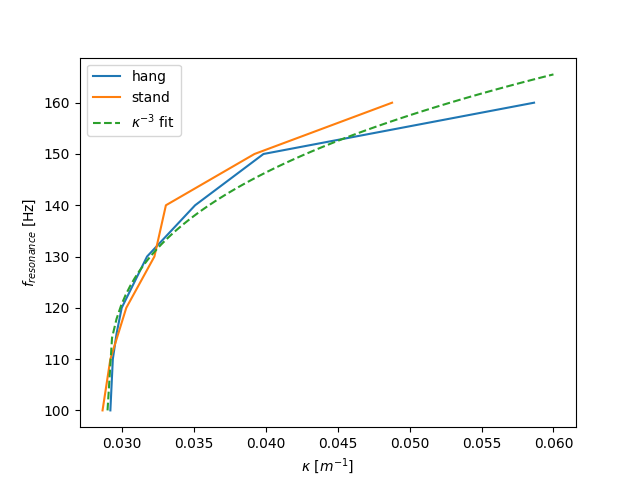

In [154]:
l = 70
ds_hang = [68.5, 68.1, 67.5, 66.7, 63.0, 57.0, 50.2, 34.1]
fs_hang = [100, 110, 115, 120, 130, 140, 150, 160]
kappas_hang = []

ds_stand = [69.8, 68.5, 66.0, 62.0, 60.5, 51.0, 41.0]
fs_stand = [100, 110, 120, 130, 140, 150, 160]
kappas_stand = []


def get_r(l, d):
    # l = r * asin(2r/d)

    best_r = 0
    best_dev = 10000
    for r in np.linspace(0, d / 2, 1000):
        dev = r * math.asin(2 * r / d) - l

        if abs(best_dev) > abs(dev):
            best_dev = dev
            best_r = r

    return best_r


kappas_hang = lmap(lambda d: 1/get_r(l, d), ds_hang)
kappas_stand = lmap(lambda d: 1/get_r(l, d), ds_stand)

plt.xlabel("$\kappa$ [$m^{-1}$]")
plt.ylabel("$f_{resonance}$ [Hz]")
plt.plot(kappas_hang, fs_hang, label="hang")
plt.plot(kappas_stand, fs_stand, label="stand")

X = np.linspace(0.029, 0.06, 100)
(k, _) = opt.curve_fit(lambda x, a: a * np.cbrt(x - 0.029) + 100, kappas_hang + kappas_stand, fs_hang + fs_stand)
print(k)
Y = k * np.cbrt(X - 0.029) + 100
plt.plot(X, Y, "--", label="$\kappa^{-3}$ fit")

plt.legend()

# Rychlost šíření

$
f = 5 \cdot \frac{60 fps}{75 f} = 4 Hz \\
\lambda / 2 = 0.42m \\
v_0 = 3.35 m/s
$

$
f = 3 \cdot \frac{60 fps}{24 f} = 7.5 Hz \\
\lambda / 2 = 0.33m \\
v_1 = 4.95 m/s
$


https://www.acs.psu.edu/drussell/Demos/Dispersion/Flexural.html
$$
c_L = \sqrt{\frac{E}{\rho}} \\
c_{flex} = \sqrt{2 \pi f K c_L} = \sqrt{2 \pi f} \sqrt[4]{\frac{Eh^3}{12 \rho (1-\nu^2)}}
$$

[0.70269809] 0.12433883890169366


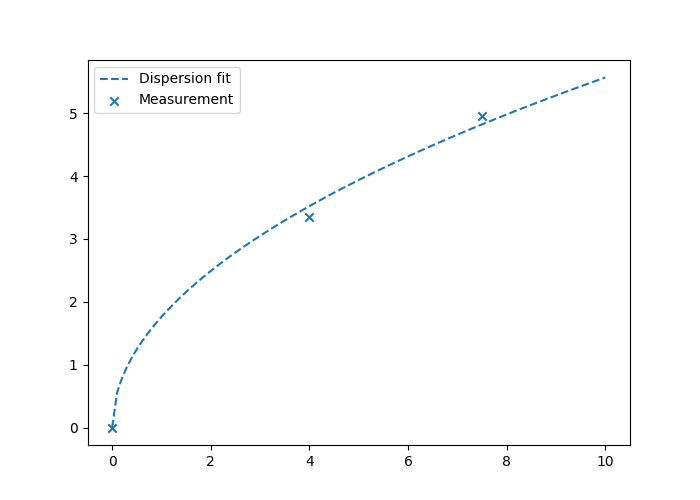

In [155]:
plt.figure(figsize=(7,5))

xdat = [0, 4, 7.5]
ydat = [0, 3.35, 4.95]

(k, _) = opt.curve_fit(lambda f, k: k * np.sqrt(2*math.pi*f), xdat, ydat)

E = 2.855e9
h = 1e-3
rho = 1185
nu = 0.4
k_theor = math.pow((E*h**3)/(12*rho*(1-nu**2)), 1/4)

X = np.linspace(0, 10, 100)
Y = k * np.sqrt(2*math.pi*X)
plt.plot(X, Y, "--", label="Dispersion fit")
plt.scatter(xdat, ydat, marker="x", label="Measurement")
plt.legend()

print(k, k_theor)